In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def loadData():
    tarballPath = Path("datasets/housing.tgz")
    if not tarballPath.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarballPath)
        with tarfile.open(tarballPath) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = loadData()

In [2]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


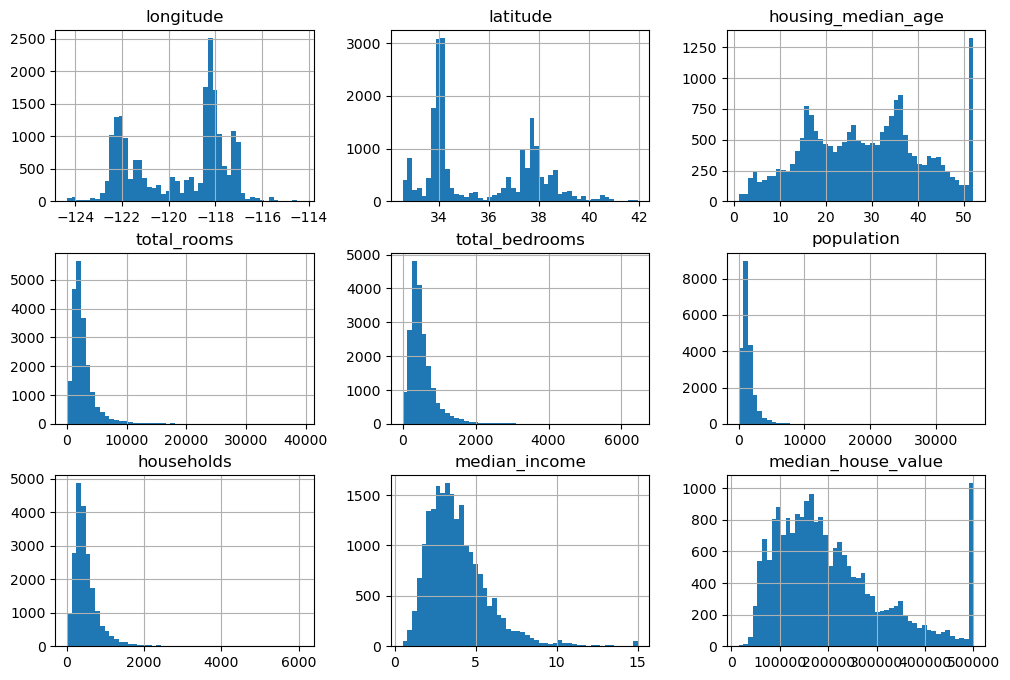

In [6]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()

- Create test set at the first to avoid *data snooping* bias

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- The test and train set should be *stratified*. It should be a representative of the whole data.
- For stratified sampling, we need an attribute as a basis for the stratae. Here `median_income` is used.

In [8]:
housing["income_category"] = pd.cut(housing["median_income"], 
                                            bins=[0., 1.5, 3, 4.5, 6., np.inf],
                                            labels=[1, 2, 3, 4, 5])
                                   

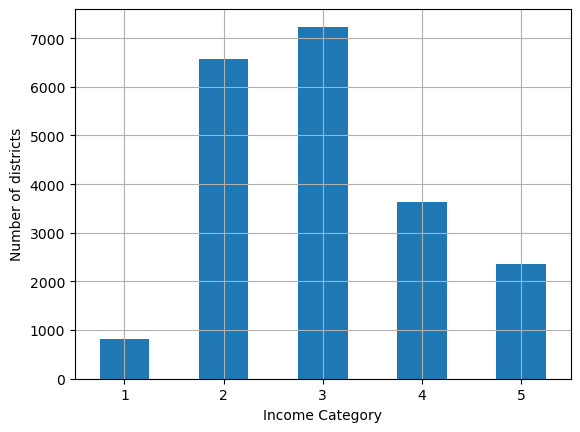

In [9]:
housing["income_category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_category"], random_state=42)

In [11]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [12]:
print(strat_test_set["income_category"].value_counts() / len(strat_test_set))
print(strat_train_set["income_category"].value_counts()/len(strat_train_set))
print(housing["income_category"].value_counts() / len(housing))

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
income_category
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_category
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


In [13]:
for set_ in [strat_test_set, strat_train_set]:
    set_.drop("income_category", axis=1, inplace=True)

In [14]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


In [15]:
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

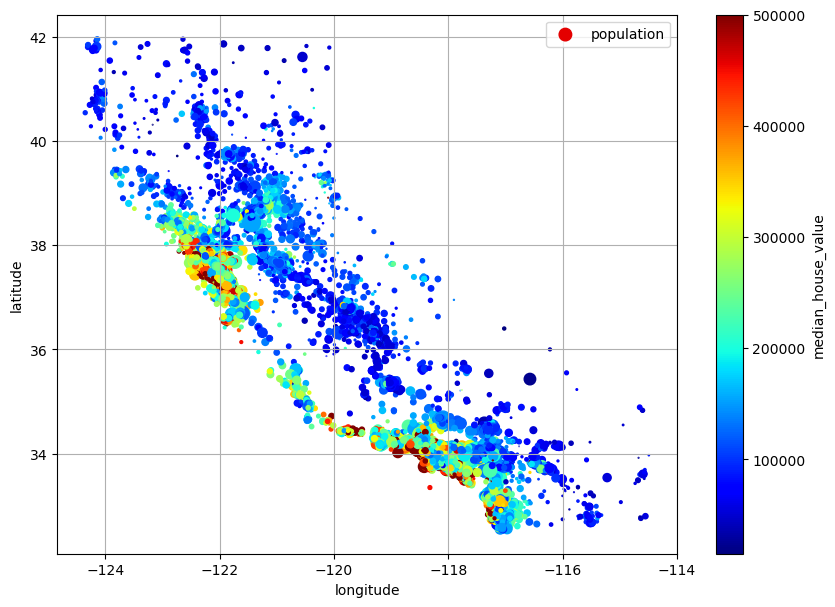

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=1, s=housing["population"]/100, c="median_house_value", label="population", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7))

In [17]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635


`corr_matrix` can be used to calculate the *standard correlation coefficient* aka *Person's r*. 
- r denotes linear correlation between two quantities
- r ranges from -1 to 1.
- tending to 1 means strong positive correlation
- tending to 0 means there is no linear correlation

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

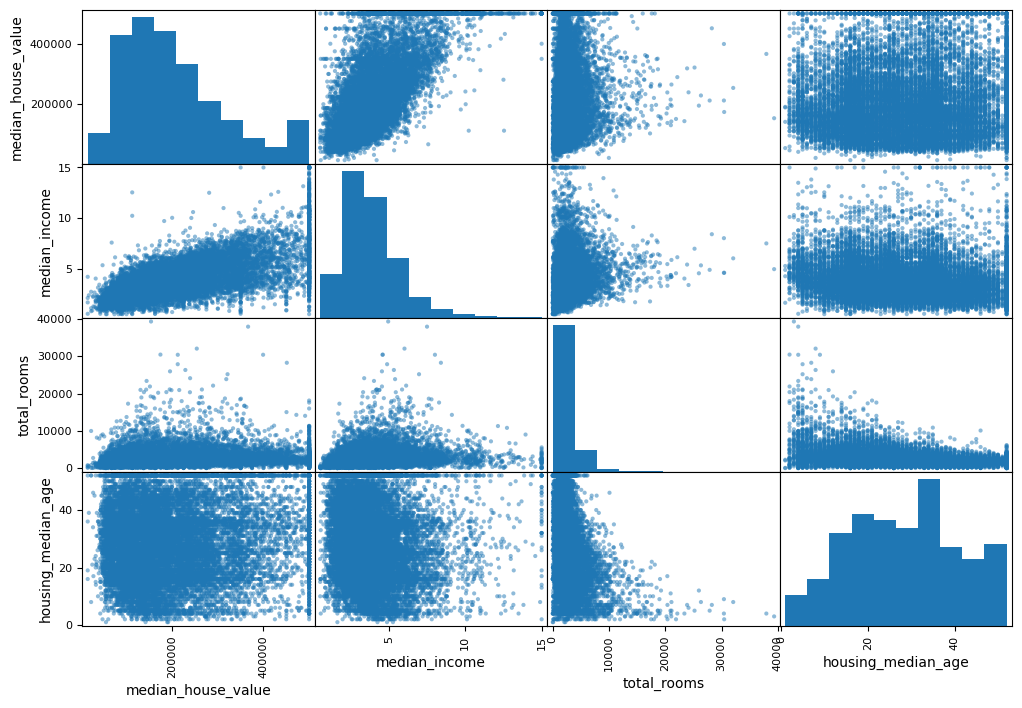

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

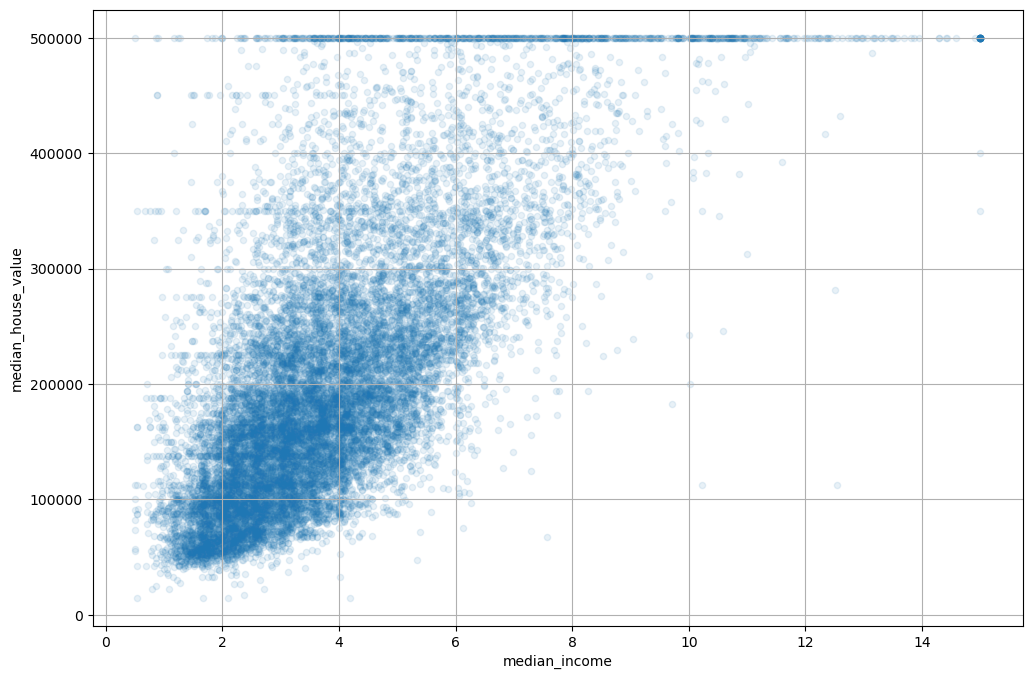

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True, figsize=(12,8))

In [21]:
# Experimenting with attribute combinations might also help.
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [22]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [23]:
# Separating the predictors and the labels

housing = strat_train_set.drop("median_house_value", axis=1)
# note that drop() creates a copy of the data and does not affect strat_train_set

housing_labels = strat_train_set["median_house_value"].copy()

**Cleaning and Preprocessing the Data, 3 options:**
1. get rid of corresponding entries
2. get rid of the whole attribute
3. replace the missing values to some value(zero, the mean, the median, etc.). This is called *imputing*.

**Imputers available in sklearn.impute**
1. *SimpleImputer*
2. *KNNImputer* - replaces each missing value with the mean of the k-nearest neighbors’ values for that feature. The distance is based on all the available features.
3. *IterativeImputer* - trains a regression model per feature to predict the missing values based on all the other available features. It then trains the model again on the updated data, and repeats the process several times, improving the models and the replacement values at each iteration.

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# strategy can also be "mean", "most_frequent", or "constant", fill_value=...

# since the median can only be computed on numerical attributes, 
# you then need to create a copy of the data with only the numerical
#  attributes (this will exclude the text attribute ocean_proximity):
housing_num = housing.select_dtypes(include=np.number)

imputer.fit(housing_num)
# the imputer computes the median of each attribute and stores it in its statistic_ instance variable

X = imputer.transform(housing_num)
# sklearn transformers output NumPy arrays even when they are fed Pandas DataFrame as input.
print(type(X))
# X has neither column names nor index

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index= housing_num.index)


<class 'numpy.ndarray'>


In [25]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

#### Handling Text and Categorical Attributes
Encoders used:
1. **OrdinalEncoder** : Assigns a integral value to each category, in alphabetical order. E.g., Female --> 0, Male --> 1\
One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values.\

2. **OneHotEncoder** : Creates one binary attribute per category. \
This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes.

In [26]:
housing_cat = housing[["ocean_proximity"]]
# double square brackets to output Pandas DataFrame instead of Pandas Series
# alternate:
#housing_cat = housing["ocean_proximity"]
#housing_cat = pd.DataFrame(housing_cat)

print(type(housing_cat))

<class 'pandas.core.frame.DataFrame'>


In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_ordinal = ordinal_encoder.fit_transform(housing_cat)

#print(ordinal_encoder.categories_)


In [28]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

housing_cat_onehot = onehot_encoder.fit_transform(housing_cat)
# by default the output of a OneHotEncoder is a SciPy sparse matrix, instead of a NumPy array 

print(onehot_encoder.categories_)



[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


> A sparse matrix is a very efficient representation for matrices that contain mostly zeros. Indeed, internally it only stores the nonzero values and their positions(in tuples). When a categorical attribute has hundreds or thousands of categories, one-hot encoding it results in a very large matrix full of 0s except for a single 1 per row. In this case, a sparse matrix is exactly what you need: it will save plenty of memory and speed up computations. 

In [29]:
# To convert sparse matrix to dense matrix
housing_cat_onehot.toarray()

# alternate
# onehot_encoder = OneHotEncoder(sparse=False)

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

#### Feature Scaling and Transformation

Here, the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms.

2 common ways to fix this:
1. ***min-max scaling*** or ***normalization***: performed by subtracting the min value and dividing by the difference between the min and the max. \

2. ***standardization***: first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1). Unlike min-max scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers. For example, suppose a district has a median income equal to 100 (by mistake), instead of the usual 0–15. Min-max scaling to the 0–1 range would map this outlier down to 1 and it would crush all the other values down to 0–0.15, whereas standardization would not be much affected. 

In [30]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [31]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaler = std_scaler.fit_transform(housing_num)

>When a feature’s distribution has a heavy tail (i.e., when values far from the mean
are not exponentially rare), both min-max scaling and standardization will squash
most values into a small range.